In [2]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [3]:
with zipfile.ZipFile("credit-risk-dataset.zip") as myzip:
    data = myzip.open("loan/loan.csv")

df = pd.read_csv(data)
df.head()

/var/folders/xg/bbnwvbx1417dhq4yrqz43j_h0000gn/T/ipykernel_59518/3253154583.py:4: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_sample = df.sample(frac=0.15)
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133107 entries, 747311 to 288319
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           133107 non-null  int64  
 1   member_id                    133107 non-null  int64  
 2   loan_amnt                    133107 non-null  float64
 3   funded_amnt                  133107 non-null  float64
 4   funded_amnt_inv              133107 non-null  float64
 5   term                         133107 non-null  object 
 6   int_rate                     133107 non-null  float64
 7   installment                  133107 non-null  float64
 8   grade                        133107 non-null  object 
 9   sub_grade                    133107 non-null  object 
 10  emp_title                    125507 non-null  object 
 11  emp_length                   126501 non-null  object 
 12  home_ownership               133107 non-null  object 
 13 

In [5]:
df_sample.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [6]:
columns = ['loan_amnt', 'int_rate', 'term', 'dti', 'annual_inc', 'delinq_2yrs', 'open_acc',
           'grade', 'home_ownership', 'collections_12_mths_ex_med', 'revol_bal', 'total_acc',
           'loan_status']

df_clean = df_sample[columns]
df_clean.head()

,loan_amnt,int_rate,term,dti,annual_inc,delinq_2yrs,open_acc,grade,home_ownership,collections_12_mths_ex_med,revol_bal,total_acc,loan_status
747311,13600.0,12.29,36 months,30.90,49000.0,0.0,12.0,C,RENT,0.0,14846.0,17.0,Current
135903,10000.0,14.33,36 months,23.55,40000.0,0.0,10.0,C,RENT,0.0,8666.0,12.0,Current
588443,15000.0,8.18,36 months,4.04,130000.0,0.0,10.0,B,MORTGAGE,0.0,11922.0,24.0,Current
495531,10000.0,9.17,36 months,10.55,48000.0,0.0,9.0,B,RENT,0.0,6251.0,17.0,Current
247994,3000.0,12.39,36 months,22.11,33000.0,0.0,6.0,C,MORTGAGE,0.0,5639.0,8.0,Current


In [7]:
df_clean.isnull().sum()

loan_amnt                      0
int_rate                       0
term                           0
dti                            0
annual_inc                     0
delinq_2yrs                    7
open_acc                       7
grade                          0
home_ownership                 0
collections_12_mths_ex_med    26
revol_bal                      0
total_acc                      7
loan_status                    0
dtype: int64

In [8]:
def categorize_loan_status(status):
    if status in ['Fully Paid', 'In Grace Period', 'Issued']:
        return 'Normal'
    elif status in ['Late (16-30 days)', 'Late (31-120 days)']:
        return 'Delinquent'
    elif status in ['Charged Off', 'Default']:
        return 'Default'
    elif 'Does not meet the credit policy' in status:
        return 'Not Compliant'
    elif 'Current' in status:
        return 'Current'
    else:
        return 'Unknown'
    
df_clean['loan_status'] = df_clean['loan_status'].apply(categorize_loan_status)

/var/folders/xg/bbnwvbx1417dhq4yrqz43j_h0000gn/T/ipykernel_59518/4248838079.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['loan_status'] = df_clean['loan_status'].apply(categorize_loan_status)


/var/folders/xg/bbnwvbx1417dhq4yrqz43j_h0000gn/T/ipykernel_59518/3937926381.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='loan_status', y='loan_amnt', palette='Set1' ,data=df_clean)


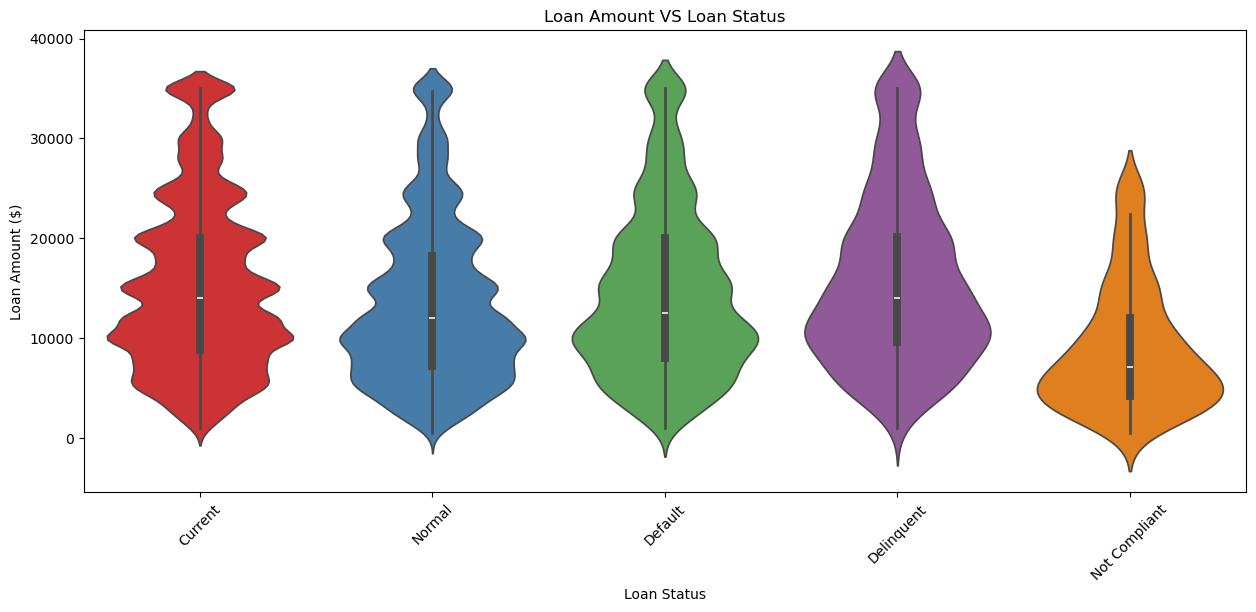

In [9]:
plt.figure(figsize=(15, 6))
sns.violinplot(x='loan_status', y='loan_amnt', palette='Set1' ,data=df_clean)
plt.title('Loan Amount VS Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount ($)')
plt.xticks(rotation=45)
plt.show()

/var/folders/xg/bbnwvbx1417dhq4yrqz43j_h0000gn/T/ipykernel_59518/412410739.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='grade', y='loan_amnt', data=df_clean, palette='Set3', order=order_grade)


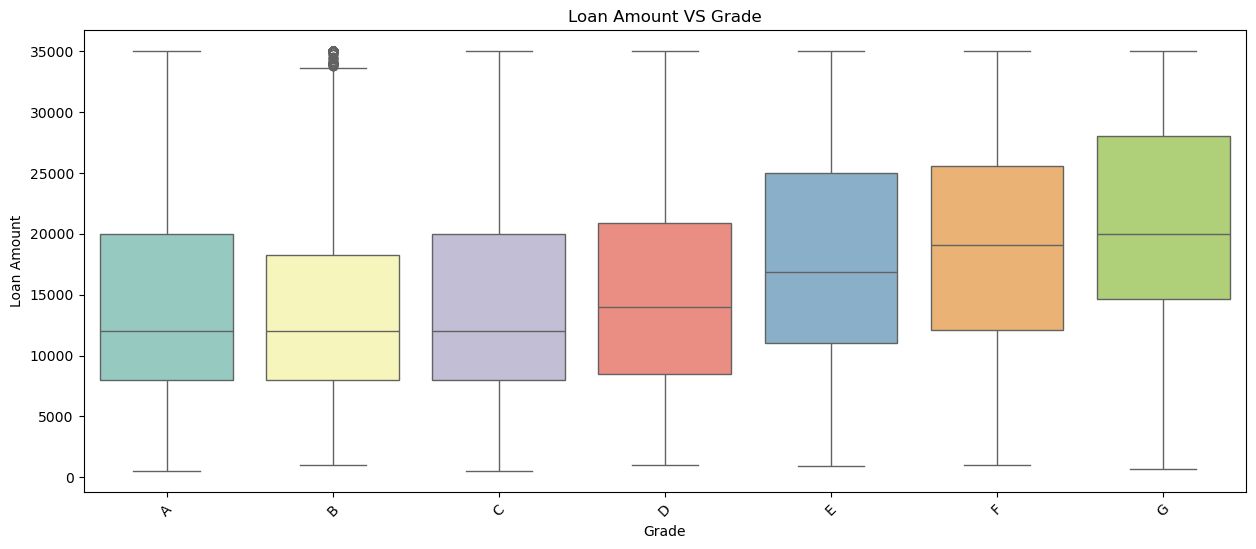

In [10]:
order_grade  = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

plt.figure(figsize=(15, 6))
sns.boxplot(x='grade', y='loan_amnt', data=df_clean, palette='Set3', order=order_grade)
plt.title('Loan Amount VS Grade')
plt.xlabel('Grade')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()

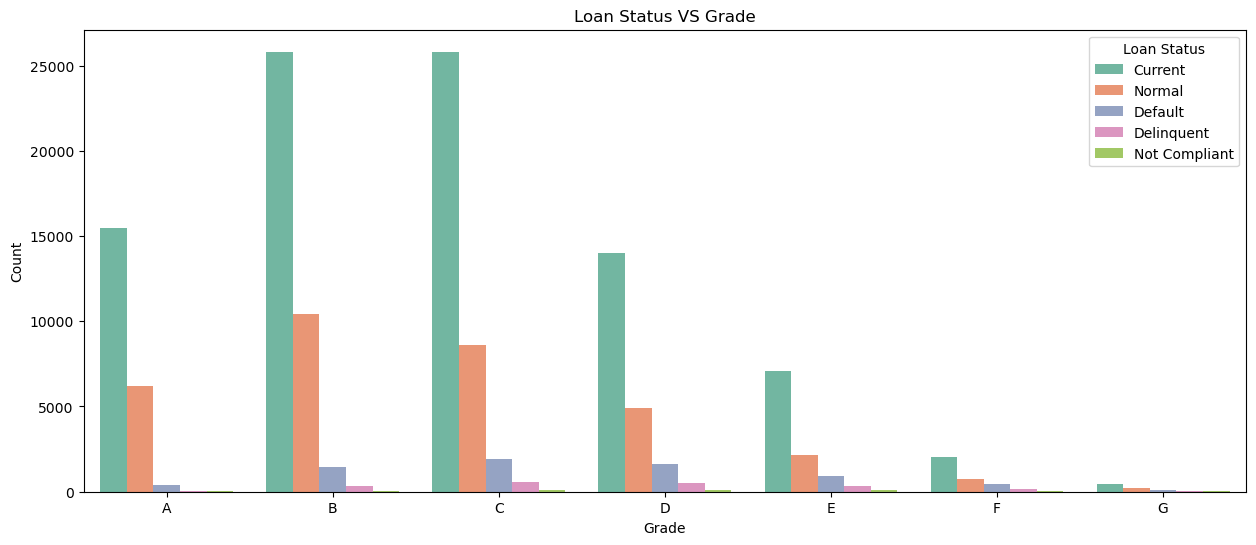

In [11]:
plt.figure(figsize=(15, 6))
sns.countplot(x='grade', hue='loan_status', data=df_clean, palette='Set2', order= order_grade)
plt.title('Loan Status VS Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

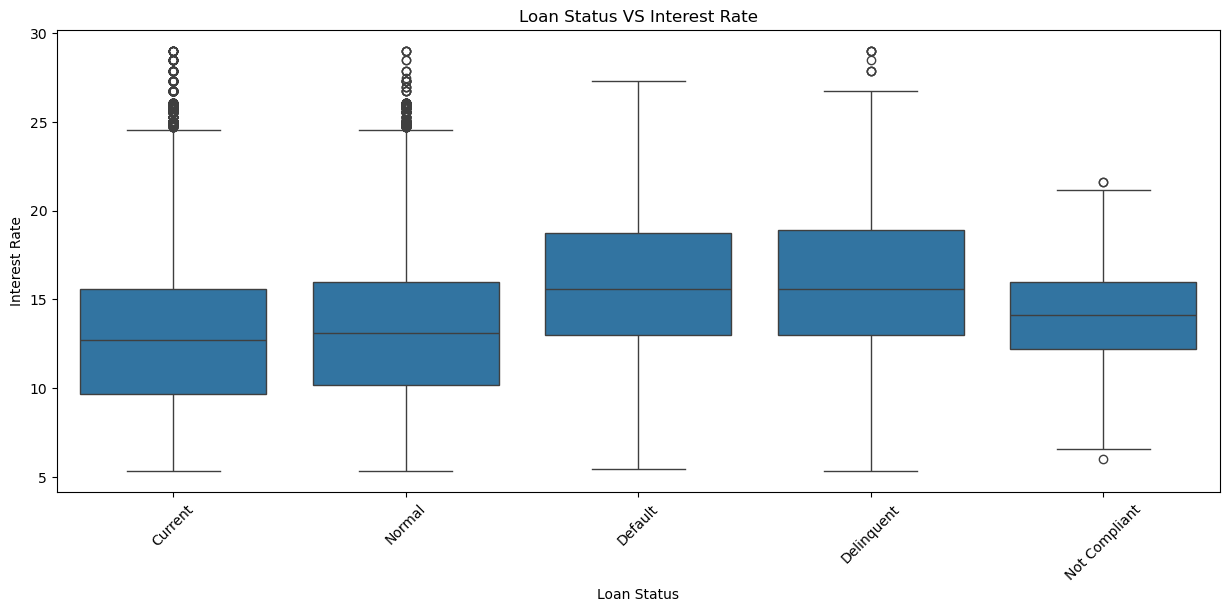

In [12]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='loan_status', y = 'int_rate', data=df_clean)
plt.title('Loan Status VS Interest Rate')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.xticks(rotation=45)
plt.show()

Loan Status VS Home Ownership

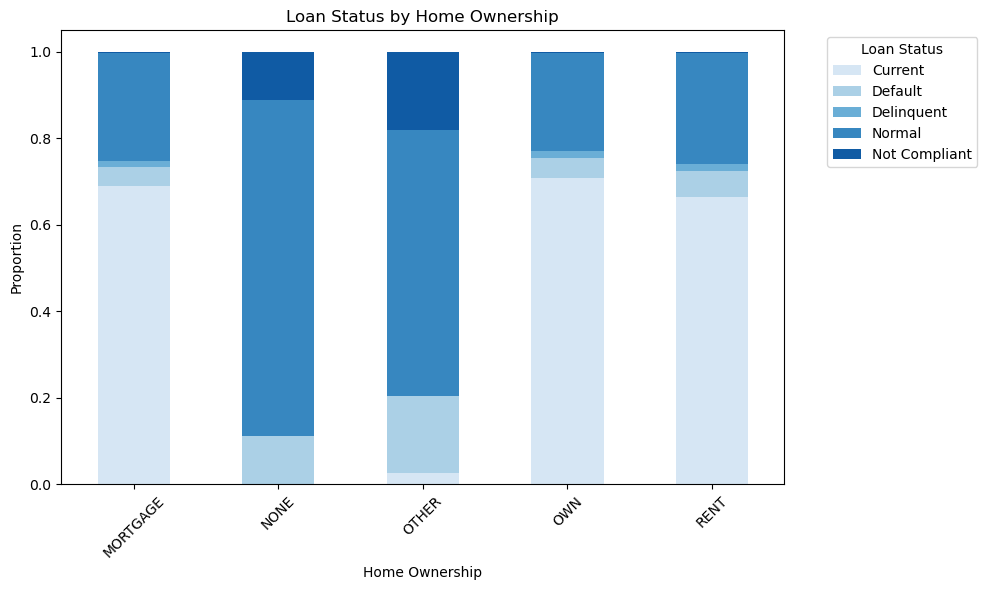

In [13]:
cross_tab = pd.crosstab(df_clean['home_ownership'], df_clean['loan_status'])

cross_tab_percentage = cross_tab.div(cross_tab.sum(1), axis=0)

colors = sns.color_palette("Blues", n_colors=cross_tab_percentage.shape[1])
cross_tab_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

plt.title('Loan Status by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Proportion')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Converting Categorical Data in to Numerical Data (Multi-Class Classification)

In [14]:
from sklearn.preprocessing import LabelEncoder

def LabelEncoder1(text):
    if text == 'A':
        return 1
    elif text == 'B':
        return 2
    elif text == 'C':
        return 3
    elif text == 'D':
        return 4
    elif text == 'E':
        return 5
    elif text == 'F':
        return 6
    elif text == 'G':
        return 7

def LabelEncoder2(text):
    if text == ' 36 months':
        return 1
    else:
        return 2
    
def LabelEncoder3(text):
    if text == "RENT":
        return 1
    elif text == "MORTGAGE":
        return 2
    elif text == "OWN":
        return 3
    else:
        return 0
    
df_clean['grade'] = df_clean['grade'].apply(LabelEncoder1)
df_clean['term'] = df_clean['term'].apply(LabelEncoder2)
df_clean['home_ownership'] = df_clean['home_ownership'].apply(LabelEncoder3)



/var/folders/xg/bbnwvbx1417dhq4yrqz43j_h0000gn/T/ipykernel_59518/2029230757.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['grade'] = df_clean['grade'].apply(LabelEncoder1)
/var/folders/xg/bbnwvbx1417dhq4yrqz43j_h0000gn/T/ipykernel_59518/2029230757.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['term'] = df_clean['term'].apply(LabelEncoder2)
/var/folders/xg/bbnwvbx1417dhq4yrqz43j_h0000gn/T/ipykernel_59518/2029230757.py:37: SettingWithCopyWarning: 
A value is trying to be set on

In [15]:
df_clean[['grade', 'term', 'home_ownership']].head()

,grade,term,home_ownership
747311,3,1,1
135903,3,1,1
588443,2,1,2
495531,2,1,1
247994,3,1,2


In [16]:
df_clean['loan_status'].value_counts().reset_index()

,loan_status,count
0,Current,90625
1,Normal,33252
2,Default,6861
3,Delinquent,1970
4,Not Compliant,399


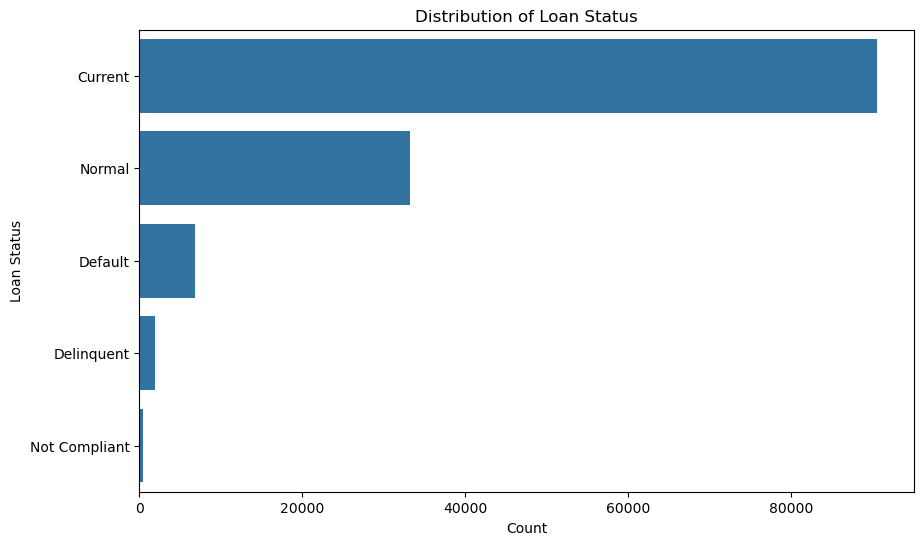

In [17]:
loan_status_counts = df_clean['loan_status'].value_counts().reset_index()
loan_status_counts.columns = ['Loan Status', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(y='Loan Status', x='Count', data=loan_status_counts)

plt.title('Distribution of Loan Status')
plt.ylabel('Loan Status')
plt.xlabel('Count')

plt.show()

Encoding Y to numeric values

In [18]:
y = df_clean['loan_status']

def y_encoded(text):
    if text == "Normal":
        return 0
    elif text in ['Default', 'Delinquent', 'Not Compliant']:
        return 1
    else:
        return 2
    
y_encode =  y.apply(y_encoded)

In [19]:
y_encode.value_counts().reset_index()

,loan_status,count
0,2,90625
1,0,33252
2,1,9230


/var/folders/xg/bbnwvbx1417dhq4yrqz43j_h0000gn/T/ipykernel_59518/483953037.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Count', x='Loan Status', data=loan_status_counts, palette="Blues")


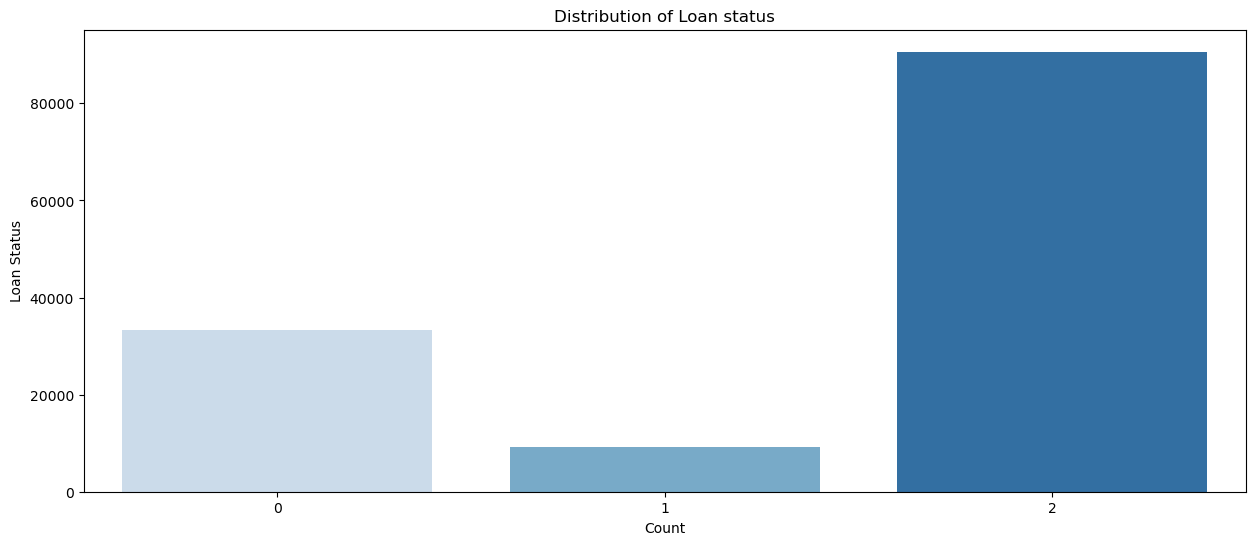

In [20]:
loan_status_counts = y_encode.value_counts().reset_index()
loan_status_counts.columns = ['Loan Status', 'Count']

plt.figure(figsize=(15, 6))
sns.barplot(y='Count', x='Loan Status', data=loan_status_counts, palette="Blues")

plt.title("Distribution of Loan status")
plt.xlabel('Count')
plt.ylabel('Loan Status')

plt.show()

Removing "Current" from Loan Status since this is not relavent to the model

In [21]:
df_clean = df_clean[df_clean['loan_status'] != 'Current']

In [22]:
df_clean['loan_status'].unique()

array(['Normal', 'Default', 'Delinquent', 'Not Compliant'], dtype=object)

In [32]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

X = df_clean.drop('loan_status', axis=1)
y = df_clean['loan_status']

y_encoded = y.map({'Normal': 0, 'Delinquent':1, 'Default':1, 'Not Compliant': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded,random_state=42, test_size=0.2, stratify=y_encoded)

xgb_model = xgb.XGBClassifier(use_label_encoder=False, n_estimators=500, learning_rate=0.01,
                              subsample=0.8, colsample_bytree=0.8)



In [33]:
xgb_model.fit(X_train, y_train)

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [14:55:45] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [35]:

y_pred = xgb_model.predict(X_test)

y_prob = xgb_model.predict_proba(X_test)[:, 1]

auc_score = roc_auc_score(y_test, y_prob)

# Classification Report and Confusion Matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("AUC-ROC Score:", auc_score)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      6651
           1       0.62      0.04      0.08      1846

    accuracy                           0.79      8497
   macro avg       0.70      0.52      0.48      8497
weighted avg       0.75      0.79      0.71      8497

Confusion Matrix:
[[6602   49]
 [1767   79]]
AUC-ROC Score: 0.702504189286861


In [36]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = oversampler.fit_resample(X_train, y_train)

print("After Oversampling:", y_oversampled.value_counts())

After Oversampling: loan_status
0    26601
1    26601
Name: count, dtype: int64


In [37]:
xgb_model_oversampled = xgb_model.fit(X_oversampled, y_oversampled)

y_pred = xgb_model_oversampled.predict(X_test)

y_prob = xgb_model_oversampled.predict_proba(X_test)[:, 1]

auc_score = roc_auc_score(y_test, y_prob)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("AUC-ROC Score:", auc_score)

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [15:11:17] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.65      0.74      6651
           1       0.34      0.64      0.44      1846

    accuracy                           0.65      8497
   macro avg       0.60      0.65      0.59      8497
weighted avg       0.75      0.65      0.68      8497

Confusion Matrix:
[[4300 2351]
 [ 658 1188]]
AUC-ROC Score: 0.6992736696132988
